# MegaLine

- La compañia MegaLine muchis de sus clientes tienes planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de MegaLine: Smart o Ultra.
- Tengo acceso a los nuevos usuarios los cuales ya cuentan con el nuevo servicio.

**Meta**
- Crear model que escoja el plan correcto, procesar los datos.
- Desarrollar un model con un umbral mayor a 0.75.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
df_users = pd.read_csv('/Users/gerardomacedo/Documents/TripleTen/Projecto/MegaLine/users_behavior.csv')

## EDA

In [3]:
def check_df(df):
    display(df.sample(5))
    display(df.info())
    display(df.describe())
    display(df[df.duplicated()])
    display(df.isna().sum())
    

In [4]:
check_df(df_users)

,calls,minutes,messages,mb_used,is_ultra
331,13.0,104.03,2.0,7350.17,0
543,66.0,432.02,54.0,24008.36,0
1275,63.0,499.42,17.0,9599.78,0
2790,76.0,573.79,25.0,15675.64,0
2890,64.0,465.08,0.0,22535.20,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


,calls,minutes,messages,mb_used,is_ultra


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [5]:
def pairplot(df):
    sns.pairplot(df, hue='is_ultra')

In [6]:
def boxplot(df):
    fig, axes = plt.subplots(2,2, figsize=(15,10))
    sns.boxplot(y='calls', hue='is_ultra', data=df, ax=axes[0,0])
    sns.boxplot(y='minutes', hue='is_ultra', data=df, ax=axes[0,1])
    sns.boxplot(y='messages', hue='is_ultra', data=df, ax=axes[1,0])
    sns.boxplot(y='mb_used', hue='is_ultra', data=df, ax=axes[1,1])

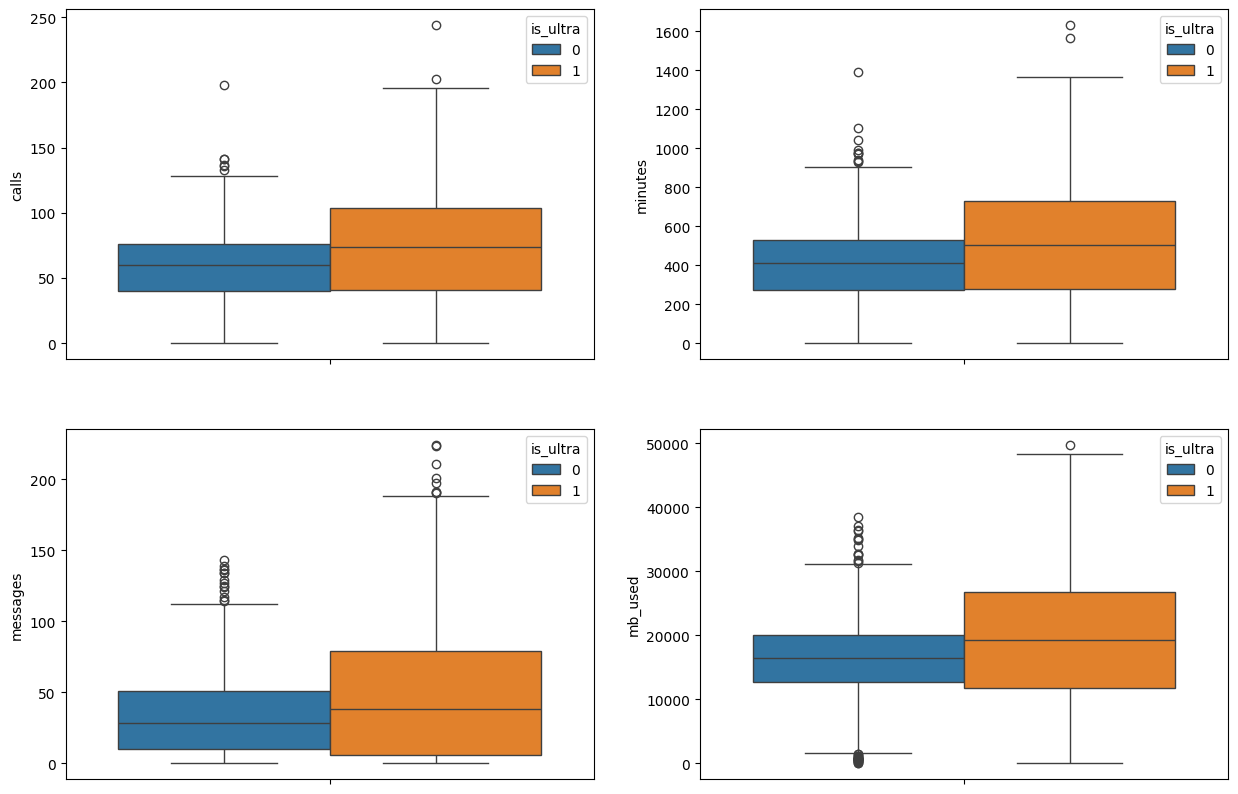

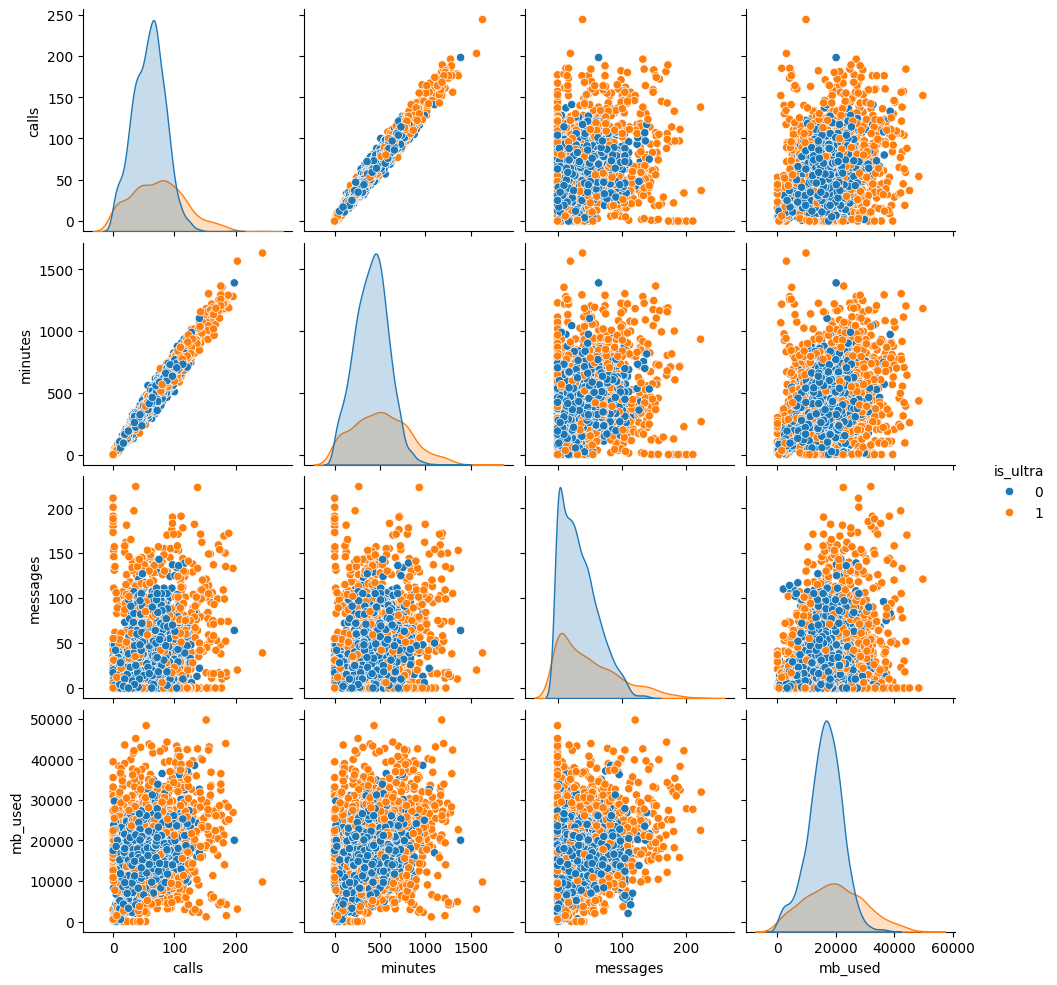

In [7]:
boxplot(df_users)
pairplot(df_users)

Podemos notar un desbalanceo en los usuarios que no son ultra, vamos a balancear para que queden cercano a la media de 0.5

In [8]:
features = df_users.drop('is_ultra', axis=1)
target = df_users.is_ultra

In [9]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsample = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsample = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsample, target_upsample = shuffle(features_upsample, target_upsample, random_state=123)
    return features_upsample, target_upsample

In [10]:
features_upsample, target_upsample = upsample(features,target,repeat=2)


In [11]:
df = pd.concat([features_upsample, target_upsample], axis=1)

In [12]:
df

,calls,minutes,messages,mb_used,is_ultra
2936,59.0,409.21,31.0,19638.50,0
2657,37.0,258.09,0.0,45180.75,1
1057,81.0,516.56,2.0,19457.42,1
565,112.0,856.90,0.0,28002.44,0
1072,97.0,645.82,51.0,10471.58,0
...,...,...,...,...,...
2308,62.0,396.29,0.0,17621.26,0
2760,52.0,371.86,84.0,9536.33,1
1962,54.0,419.13,38.0,26240.86,0
718,94.0,641.46,17.0,16670.23,1


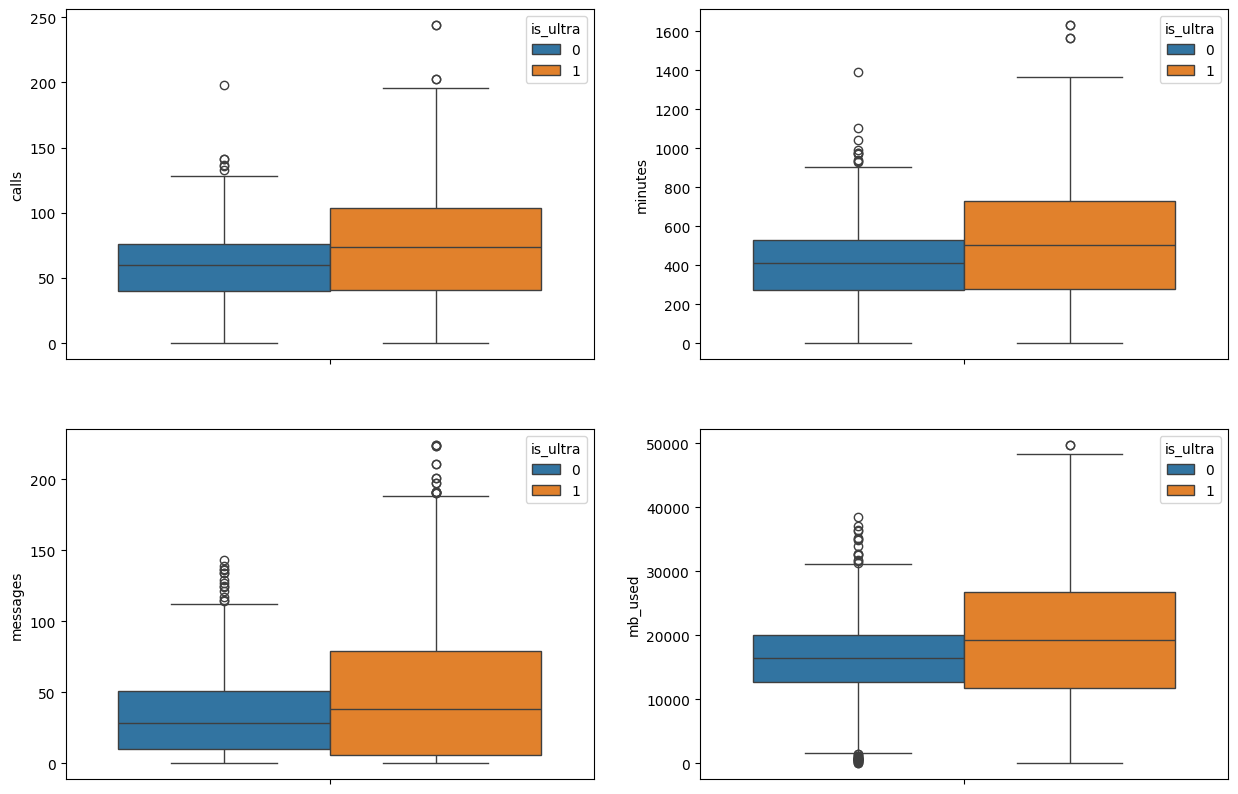

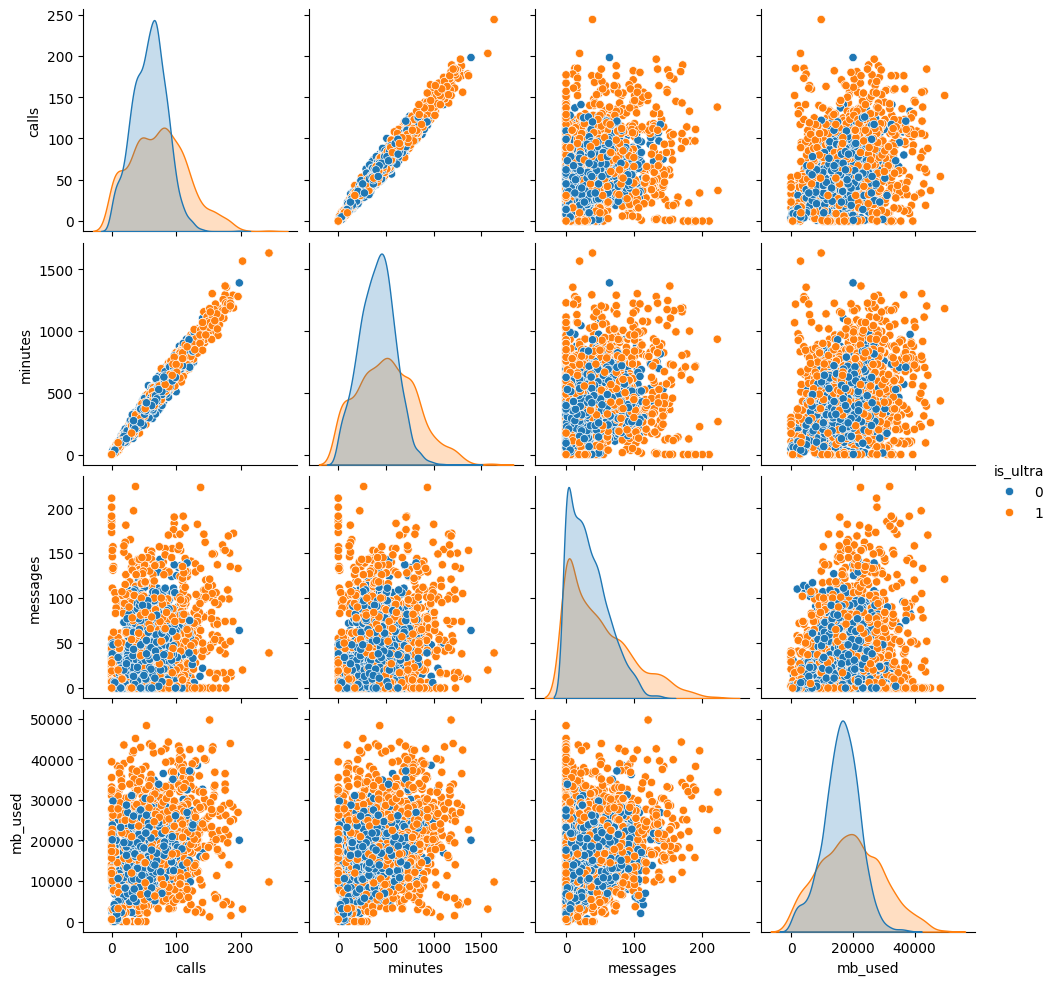

In [13]:
boxplot(df)
pairplot(df)

In [14]:
check_df(df)

,calls,minutes,messages,mb_used,is_ultra
66,80.0,556.36,64.0,24049.46,0
1140,40.0,195.79,55.0,19493.38,0
957,152.0,1181.82,121.0,49745.73,1
2048,53.0,243.98,41.0,0.00,1
1940,61.0,391.04,21.0,20625.04,0


<class 'pandas.core.frame.DataFrame'>
Index: 4199 entries, 2936 to 1166
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     4199 non-null   float64
 1   minutes   4199 non-null   float64
 2   messages  4199 non-null   float64
 3   mb_used   4199 non-null   float64
 4   is_ultra  4199 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 196.8 KB


None

,calls,minutes,messages,mb_used,is_ultra
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,65.467730,455.336804,40.880924,17738.093496,0.469159
std,36.287709,255.559194,39.469229,8284.853015,0.499107
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,275.130000,9.000000,12413.060000,0.000000
50%,64.000000,442.650000,31.000000,17275.470000,0.000000
75%,86.000000,601.140000,61.000000,22218.425000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


,calls,minutes,messages,mb_used,is_ultra
542,107.0,729.44,153.0,32990.68,1
41,11.0,85.31,7.0,10764.82,1
3112,99.0,678.61,171.0,34297.22,1
1941,189.0,1188.18,172.0,25142.93,1
2560,108.0,775.50,75.0,10121.53,1
...,...,...,...,...,...
3107,0.0,0.00,0.0,530.78,1
3006,83.0,566.78,66.0,22497.52,1
2760,52.0,371.86,84.0,9536.33,1
718,94.0,641.46,17.0,16670.23,1


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Con el upsample aumentamos a 985 renglones de ejemplos de ULTRA esto para tener un equilibrio en nuestras clases.

## Separacion de entrenamiento y validacion

In [15]:
features_train, features_valid, target_train, target_valid = train_test_split(features_upsample, target_upsample, test_size=0.2, random_state=1234)

## Modelos

### DecisionTree

In [16]:
def modelDecisionTree(n,features_train,target_train,features_valid,target_valid):
    model = DecisionTreeClassifier(random_state=12345, max_depth=n).fit(features_train,target_train)
    score = model.score(features_valid,target_valid)
    return score

In [17]:
def bestNDecision(model,features_train,target_train,features_valid,target_valid):
    for n in range(1,100):
        score=0
        modelScore = model(n,features_train, target_train, features_valid, target_valid)
        if score <= modelScore:
            score = modelScore
            depth = n
        else:
            exit
        
    print('The best Score: ',score,'The best Depth: ', depth)

In [18]:
bestNDecision(modelDecisionTree,features_train,target_train,features_valid,target_valid)
bestNDecision(modelDecisionTree,features_train,target_train,features_train,target_train)

The best Score:  0.8428571428571429 The best Depth:  99
The best Score:  1.0 The best Depth:  99


### Random Forest

In [19]:
def modelRandom(n,features_train,target_train,features_valid,target_valid):
    model = RandomForestClassifier(random_state=12345, n_estimators=n).fit(features_train,target_train)
    score = model.score(features_valid,target_valid)
    return score

In [ ]:
bestNDecision(modelRandom,features_train,target_train,features_valid,target_valid)
bestNDecision(modelRandom,features_train,target_train,features_train,target_train)

The best Score:  0.8821428571428571 The best Depth:  99


### Regresion Logistica

In [137]:
def modelLogistic(features_train,target_train,features_valid,target_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear').fit(features_train,target_train)
    score = model.score(features_valid,target_valid)
    print('El Mejor score',score)

In [138]:
modelLogistic(features_train,target_train,features_valid,target_valid)

El Mejor score 0.6595238095238095
